**Main Sources** 
    1. https://notgnoshi.github.io/linear-transformations/
    2. https://dododas.github.io/linear-algebra-with-python/posts/16-12-29-2d-transformations.html
    
**Further Reading**
    1. https://mmas.github.io/linear-transformations-numpy


# <center>2D Linear Transformations</center> #

A linear transformation of the plane $\mathbb{R}^2$ is a geometric transformation of the form
$$ 
  A\vec{x} = \vec{w}\ \ \  \Leftrightarrow \ \ \ 
  \left[ \begin{array}{cc}
                a & b\\ c & d
           \end{array} 
  \right]
   \left[ \begin{array}{c}
                x\\ y
           \end{array} 
  \right] = 
  \left[ \begin{array}{c}
                u\\ v
           \end{array} 
  \right] 
$$
where $a, b, c$ and $d$ are real numbers.

Linear transformations leave the origin fixed and preserve parallelism. As an example,
consider the matrix
$$
  A = \left[\begin{array}{cc}
          2 & -1 \\ 1 & 1
          \end{array}
      \right]
$$
that transforms an arbitrary vector $\left[ \begin{array}{c}
                x\\ y
           \end{array} \right]$
to a linear combination of the column vectors of $A$:
$$
  \left[ \begin{array}{c}
                u\\ v
           \end{array} 
  \right] =
  \left[\begin{array}{cc}
          2 & -1 \\ 1 & 1
          \end{array}
   \right]       
   \left[ \begin{array}{c}
                x \\ y
           \end{array} 
  \right] =
  x \left[ \begin{array}{c}
                2\\ 1
           \end{array} 
  \right] +
  y \left[ \begin{array}{c}
                -1\\ 1
           \end{array} 
  \right].
$$
We can get a visual feel for this transformation by looking at a regular grid of points before and after the transformation:

![](img/grid-original-small.png)  ![](img/grid-transformed-small.png)

Let's look at it in action!

![](img/stepwise-transform.gif)

This notebook describes how to use `Numpy` to perform and visualize special linear transformations, the
**scaling**, **shearing**, **rotation** and **reflexion** of a plane. 

In [1]:
# Import necessary libraries:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

--------------------------------------
## 1. General Steps ##

    [1]. Create a rectangular array of points in x-y space.
    [2]. Map grid coordinates to colors that uniquely identify each point.
    [3]. Experiment and plot linear transforms.
    [4]. Create animations
       [4.1] Generate a series of intermediate transforms that will “smoothly” transition from the original grid to the transformed grid.
       [4.2] Plot each of the intermediate transforms and save them as individual images.
       [4.3] Stitch images into a gif to generate an animation.
_______________________________________    


### 1.1 Generate original and transformed grids ###

To construct a grid of points, we generate evenly spaced vectors along the $x$ and $y$
axes, and combine them together into a grid

In [2]:
# Create a grid of points in x-y space 
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

Here, the $x$-axis values span from -4 to 4 and the $y$-axis value span from -3 to 3.
By stacking the $x$-$y$ pairs columnwise, we generate a $2\times 63$ rectangular grid of points:

$$
  \mathrm{xygrid} = \left[ \begin{array}{cccccccccccccc}
  -4& -4& -4& -4& -4& -4& -4& -3& -3& \cdots &  0&  1&  \cdots& 
   4&  4 \\
   -3& -2& -1&  0&  1&  2&  3& -3& -2& \cdots & 3 & -3 & \cdots &
   2 & 3
             \end{array}
             \right].
$$

We define a matrix 
$A = \left[ \begin{array}{cc}
              2 & -1 \\ 1 & 1
            \end{array}
      \right]
$ 
and generate the transformed grid by
multiplying the column vectors of $\mathrm{xygrid}$ by $A$:
$$
  \mathrm{uvgrid} = A\cdot \mathrm{xygrid}.
$$

In [3]:
# Apply linear transform
A = np.column_stack([[2, 1], [-1, 1]])
print(A)
uvgrid = np.dot(A, xygrid)

[[ 2 -1]
 [ 1  1]]


### 1.2 Plot grids ###

To plot the grid points, we will use the matplotlib function `scatter` that can apply a different color to each point. The following function transforms an $(x,y)$
coordinate pair to an rgb color:

In [4]:
# This function assigns a unique color based on position
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

We map this function to the $x$-$y$ coordinates to generate an array of rgb color, 
and then plot the $x$-$y$ grid points:

Text(0.5, 1.0, 'Original grid in x-y space')

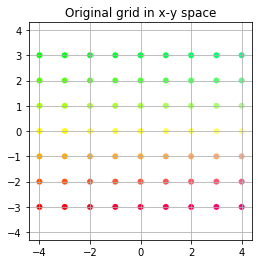

In [5]:
# Map grid coordinates to colors
colors = list(map(colorizer, xygrid[0], xygrid[1]))

# Plot grid points 
plt.figure(figsize=(4, 4), facecolor="w")
plt.scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor="none")
# Set axis limits
plt.grid(True)
plt.axis("equal")
plt.title("Original grid in x-y space")

Similarly, We can plot the transformed grid:

Text(0.5, 1.0, 'Transformed grid in u-v space')

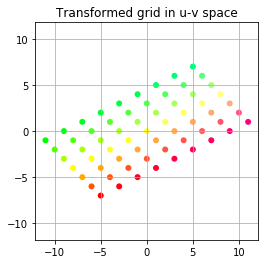

In [6]:
# Plot transformed grid points
plt.figure(figsize=(4, 4), facecolor="w")
plt.scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor="none")
plt.grid(True)
plt.axis("equal")
plt.title("Transformed grid in u-v space")

Another example.

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


Text(0.5, 1.0, 'Transformed grid in u-v space')

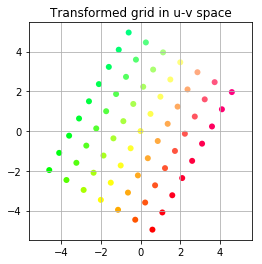

In [7]:
# Rotation
theta = np.pi/3 # 60 degree clockwise rotation
B = np.column_stack([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
print(B)

uvgrid2 = np.dot(B, xygrid)

plt.figure(figsize=(4, 4), facecolor="w")
plt.scatter(uvgrid2[0], uvgrid2[1], s=36, c=colors, edgecolor="none")
plt.grid(True)
plt.axis("equal")
plt.title("Transformed grid in u-v space")

## 2. Linear transformation on images ##

Here we will do basic liear transformations on images. There are many advanced python modules of manipulating images, and you may google to find out. One example is [here](https://automatetheboringstuff.com/chapter17/).

In [8]:
# Import a image manipulating library 
#import imageio
import matplotlib.image as mpimg

### 2.1 Images are Data###

In [9]:
# Load an image file.
RGB_Image = mpimg.imread("./img/lennon.png")

# To see basic features of the imported image.
print(type(RGB_Image), RGB_Image.dtype, RGB_Image.shape) 
print(' ' )
print(RGB_Image) # See the image as ndarray

<class 'numpy.ndarray'> float32 (766, 766, 4)
 
[[[0.8666667  0.90588236 0.8784314  1.        ]
  [0.87058824 0.9098039  0.88235295 1.        ]
  [0.8784314  0.91764706 0.8901961  1.        ]
  ...
  [0.3372549  0.23529412 0.22352941 1.        ]
  [0.33333334 0.23921569 0.22352941 1.        ]
  [0.34117648 0.24705882 0.23137255 1.        ]]

 [[0.8666667  0.90588236 0.8784314  1.        ]
  [0.87058824 0.9098039  0.88235295 1.        ]
  [0.87058824 0.9098039  0.88235295 1.        ]
  ...
  [0.34509805 0.24705882 0.23137255 1.        ]
  [0.34117648 0.24705882 0.23137255 1.        ]
  [0.34117648 0.24705882 0.23137255 1.        ]]

 [[0.8627451  0.9019608  0.87058824 1.        ]
  [0.8627451  0.9019608  0.87058824 1.        ]
  [0.85882354 0.8980392  0.87058824 1.        ]
  ...
  [0.34117648 0.24313726 0.22745098 1.        ]
  [0.3372549  0.24313726 0.22745098 1.        ]
  [0.3372549  0.24705882 0.23137255 1.        ]]

 ...

 [[0.6666667  0.6156863  0.5294118  1.        ]
  [0.65490

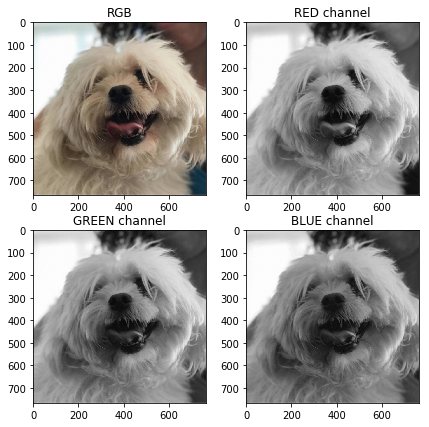

In [10]:
x, y, channel = (RGB_Image.shape)          # X size, Y size, number of channel 
                                           # (3 for RGB image).

Red_Image = RGB_Image[:,:,0]               # Store Red channel in a Numpy array.
Green_Image = RGB_Image[:,:,1]             # Store Green channel in a Numpy array.
Blue_Image = RGB_Image[:,:,2]              # Store Blue channel in a Numpy array.

#-------------------------:
# Show images on screen   :
#-------------------------:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1); plt.imshow(RGB_Image); plt.title('RGB')
plt.subplot(2,2,2); plt.imshow(Red_Image, cmap='gray'); plt.title('RED channel')
plt.subplot(2,2,3); plt.imshow(Green_Image, cmap='gray'); plt.title('GREEN channel')
plt.subplot(2,2,4); plt.imshow(Blue_Image, cmap='gray'); plt.title('BLUE channel')
plt.show()

### 2.2 Linear transformation##

In [11]:
# Define a linear transformation function
def linear_transformation(src, A):
    m, n = src.shape
    points = np.mgrid[0:n, 0:m].reshape((2, m*n))
    new_points = np.linalg.inv(A).dot(points).round().astype(int)
    x, y = new_points.reshape((2, m, n), order='F')
    indices = x + n*y
    return np.take(src, indices, mode='wrap')

In [12]:
A = np.array([[1, 0], [0, 0.5]]) # Scaling
dst = linear_transformation(Red_Image, A)

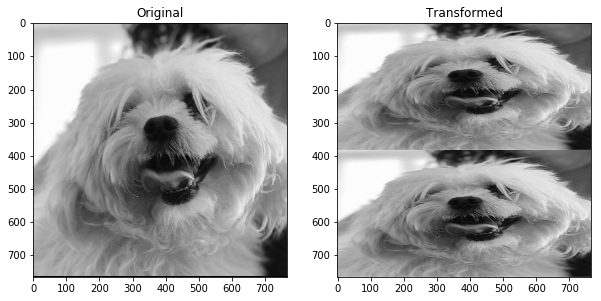

In [13]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1); plt.imshow(Red_Image, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(dst, cmap='gray'); plt.title('Transformed')
plt.show()

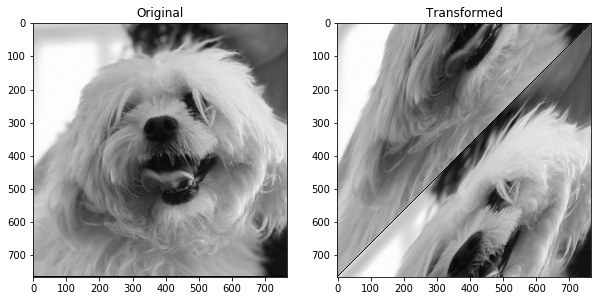

In [14]:
B = np.array([[1, 0], [-1, 1]]) # Rotation
dst2 = linear_transformation(Red_Image, B)

plt.figure(figsize = (10,10))
plt.subplot(1,2,1); plt.imshow(Red_Image, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(dst2, cmap='gray'); plt.title('Transformed')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

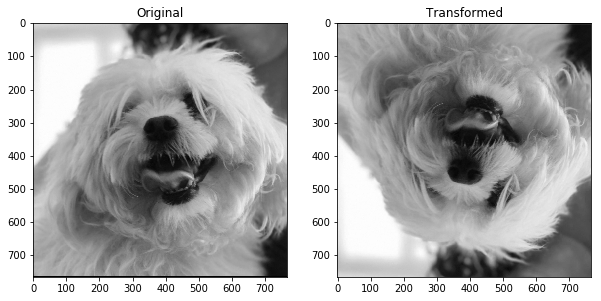

In [15]:
C = np.array([[1, 0], [0, -1]]) # Reflection about x-axis
#C = np.array([[-1, 0], [0, 1]]) # Reflection about y-axis
#C = np.array([[0, 1], [1, 0]]) # Reflection about y-axis
dst3 = linear_transformation(Red_Image, C)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1); plt.imshow(Red_Image, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(dst3, cmap='gray'); plt.title('Transformed')
plt.show

## Exercises ##

   1. Construct a $2\times 2$ matrix $A_1$ that first performs a horizontal shear transforming $\vec{e}_2$ into $\vec{e}_2+2\vec{e}_1$ (leaving $\vec{e}_1$ unchanged). Then, write a Python code to visualize the matrix transformation, as in Section 1.
   2. Construct a $2\times 2$ matrix $A_2$ that first performs and reflects vectors through the line $y=-x$. Then, write a Python code to visualize the transformation, as in Section 1.
   3. Write a Python code to compute $A =A_1A_2$ and visualize the matrix transformation $A\vec{x}$, as in Section 1.

## Further Reading ##

* [Affine transform of an image](https://matplotlib.org/gallery/images_contours_and_fields/affine_image.html#sphx-glr-gallery-images-contours-and-fields-affine-image-py)

# <center> Appendix. Generating Animations </center> #

 (Note: This **only works** on `Linux` or `OS X` and *requires* `ImageMagick` to be available at the command line)

## Generate intermediate transforms ##

To create the animated version, we need a series of intermediate grids that will 
smoothly transition from the original grid to the transformed grid. One way to achieve this is
by constructing a series of $2\times 2$ matrices that interpolate between the identity matrix 
$I = \left[ \begin{array}{cc}
              1 & 0 \\ 0 & 1
            \end{array}
      \right]
$
and the target matrix 
$A = \left[ \begin{array}{cc}
              2 & -1 \\ 1 & 1
            \end{array}
      \right].
$ 


Supose we want to do this in $n$ steps. Then the $j^{th}$ matrix in this sequence is:
$$
  A_j = I+\frac{j}{n}(A-I) = \left[ \begin{array}{cc}
                      1+j/n & -j/n\\ j/n & 1
                      \end{array}
                      \right]
$$
where $j = 0 ... n$. The matrix product
$$ A_j\cdot \mathrm{xygrid} $$
computes grid coordinates for the $j^{th}$ intermediate transform.
The following code block generates all the intermediate grids for a given target matrix, 
and returns the results in a 3D array:

In [22]:
# To animate the transform, we generate a series of intermediates
# Function to compute all intermediate transforms
def stepwise_transform(A, points, nsteps=30):
    '''
    Generate a series of intermediate transform for the matrix multiplication
      np.dot(A, points) # matrix multiplication
    starting with the identity matrix, where
      a: 2-by-2 matrix
      points: 2-by-n array of coordinates in x-y space 

    Returns a (nsteps + 1)-by-2-by-n array
    '''
    # create empty array of the right size
    transgrid = np.zeros((nsteps+1,) + np.shape(points))
    # compute intermediate transforms
    for j in range(nsteps+1):
        intermediate = np.eye(2) + j/nsteps*(A - np.eye(2)) 
        transgrid[j] = np.dot(intermediate, points) # apply intermediate matrix transformation
    return transgrid

# Apply to x-y grid
steps = 30
transform = stepwise_transform(B, xygrid, nsteps=steps)

## Plot intermediate transforms ##

Next we plot each of the intermediate grids on a common axis. To construct the animated version, 
we need to save each of these intermediate plots as an image file. The following code block defines 
a function that generates a series of image files with the filename `frame-xx.png` and saves them 
in a subdirectory `tmp`. We apply this function to the array of intermediate grid coordinates that we generated above:

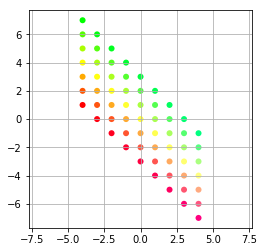

In [23]:
# Create a series of figures showing the intermediate transforms
def make_plots(transarray, color, outdir="png-frames", figuresize=(4,4), figuredpi=150):
    '''
    Generate a series of png images showing a linear transformation stepwise
    '''
    nsteps = transarray.shape[0]
    ndigits = len(str(nsteps)) # to determine filename padding
    maxval = np.abs(transarray.max()) # to set axis limits
    # create directory if necessary
    import os
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    # create figure
    plt.ioff()
    fig = plt.figure(figsize=figuresize, facecolor="w")
    for j in range(nsteps): # plot individual frames
        plt.cla()
        plt.scatter(transarray[j,0], transarray[j,1], s=36, c=color, edgecolor="none")
        plt.xlim(1.1*np.array([-maxval, maxval]))
        plt.ylim(1.1*np.array([-maxval, maxval]))
        plt.grid(True)
        plt.draw()
        # save as png
        outfile = os.path.join(outdir, "frame-" + str(j+1).zfill(ndigits) + ".png")
        fig.savefig(outfile, dpi=figuredpi)
    plt.ion()

# Generate figures
make_plots(transform, colors, outdir="png-frames")

## Creat animation##

To stitch the image sequence into an animation, we use the `ImageMagick`, a cross-platform image manipulation library. 
The following code block performs this operation by making a system call to the `convert` script that is part of ImageMagick. It will take some time to produce the animation gif file, `animation.gif`.

In [24]:
# Convert to gif (works on linux/os-x, requires image-magick)
from subprocess import call
call("cd png-frames && convert -delay 10 frame-*.png animation.gif", shell=True)
# Optional: clean up png files
call("rm -f png-frames/*.png", shell=True)

0